# Control Systems 2, Coding Exercise 01: Jupyter Notebook on Introduction to Digital Control Systems
&copy; 2024 ETH Zurich, Paolo Petri, Juncheng Fu, Niclas Scheuer, Roy Werder, Dejan Milojevic; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli


This notebook is designed to teach you the effects of discretization on continuous-time (CT) systems with a focus on showing how different methods affect stability and how the sampling time can affect your system. This notebook contains 3 exercises and a case study that mostly serves as an example. We wish you a nice time when solving this notebook.
Authors:
- Paolo Petri; ppetri@ethz.ch
- Juncheng Fu; juncfu@ethz.ch
- Niclas Scheuer; nscheuer@ethz.ch
- Roy Werder; werderr@ethz.ch

# Setup:


## Installing the required packages:

In [ ]:
%pip install cs2solutions --upgrade

## Import packages:
The following piece of code will import the packages that will be used in the code. Take note of the chosen shortcuts. If you have no experience with the [NumPy](https://numpy.org/) library, read the documentation and do some tutorials. It is very important for matrix operations in Python.

In [2]:
from cs2solutions import discretization, morse

from typing import Optional, List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy import signal as sig
from scipy.signal import butter, lfilter

## Plotting functions:
Plotting functions `discretization.plot_helpers()`, `plot_step_responses(...)`, `plot_noise_signal(...)`, and `plot_disc_stepresponse(...)` are found in the imported `cs2solutions` package. 

If you are using VSCode, you can right-click and select "Go to definition (F12)" to see the associated code. 

### Using "Go to definition (F12)" is also helpful if you are stuck with a code implementation.

## Duckiebot System Matrices
This piece of Code defines the dynamics of the Duckiebot which shall be used as an example in question 1.

In [3]:
# Save the system matrices for later use.
A = np.array([[0, 0.1], [0, 0]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

-------------------
# Exercise 1

## Exercise 1a:

Now we'll see how the different discretization schemes affect the step response of the duckiebot controller. 
Hint:
- You may use `sig.lti(...)` to create a continuous time system
- You can discretize the system using `sig.cont2discrete((...), dt=..., method='...')`
- If you are stuck, have a look at the [Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html)
- You can produce the values for a discretized step response using `sig.dstep`
- To better visualize your System we advise you to terminate all functions at the same time-value


In [4]:
def continuous_step_response(A: np.array, B: np.array, C:np.array, D:np.array) -> Tuple[np.array, np.array]:
    
    #TODO: Implement the continuous step response.
    
    t_cont, y_cont = sig.step([A,B,C,D], T=np.linspace(0, 25, 1000))
    
    # return the time and output vectors (as np.ndarray) of the step response.
    return [t_cont, y_cont]

def discrete_step_response_euler_forward(A: np.array, B: np.array, C:np.array, D:np.array, Ts: float) -> Tuple[np.array, np.array]:
    
    #TODO: Implement the discrete step response using the forward Euler discretization.

    [t_eulerf, y_eulerf] = sig.dstep(sig.cont2discrete([A,B,C,D], Ts, "gbt", 0), t=np.arange(0, 25, Ts))
    
    # return the time and output vectors (as np.ndarray) of the step response.
    return [t_eulerf, y_eulerf]

def discrete_step_response_euler_backward(A: np.array, B: np.array, C:np.array, D:np.array, Ts: float) -> Tuple[np.array, np.array]:
    
    #TODO: Implement the discrete step response using the backward Euler discretization.

    [t_eulerb, y_eulerb] = sig.dstep(sig.cont2discrete([A,B,C,D], Ts, "gbt", 1), t=np.arange(0, 25, Ts))
    
    # return the time and output vectors (as np.ndarray) of the step response.
    return [t_eulerb, y_eulerb]

def discrete_step_response_tustin(A: np.array, B: np.array, C:np.array, D:np.array, Ts: float) -> Tuple[np.array, np.array]:
    
    #TODO: Implement the discrete step response using the Tustin discretization.

    [t_tust, y_tust] = sig.dstep(sig.cont2discrete([A,B,C,D], Ts, "gbt", 0.5), t=np.arange(0, 25, Ts))
    
    # return the time and output vectors (as np.ndarray) of the step response.
    return [t_tust, y_tust]

def discrete_step_response_zoh(A: np.array, B: np.array, C:np.array, D:np.array, Ts: float) -> Tuple[np.array, np.array]:
    
    #TODO: Implement the discrete step response using the Zero Order Hold discretization.

    [t_zoh, y_zoh] = sig.dstep(sig.cont2discrete([A,B,C,D], Ts, "zoh"), t=np.arange(0, 25, Ts))
    
    # return the time and output vectors (as np.ndarray) of the step response.
    return [t_zoh, y_zoh]

If you are stuck, check the solution in the discretization module.

In [5]:
[t_cont, y_cont] = discretization.cont_solution(A, B, C, D)
[t_eulerf, y_eulerf, t_eulerb, y_eulerb, t_tust, y_tust, t_zoh, y_zoh] = discretization.disc_solution(A, B, C, D, Ts = 0.1)

# Right-click on the solution function and go to 'Go to Definition' to see the solution code.
# Otherwise use the following link:

You can find the solutions here: 

https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/discretization.py#L166

https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/discretization.py#L186

## Exercise 1a: Test your code:
Set the `Use_User_Implementation` variable to True if you want to test your own implementation. However, it is currently set to False to prevent an error from occuring.

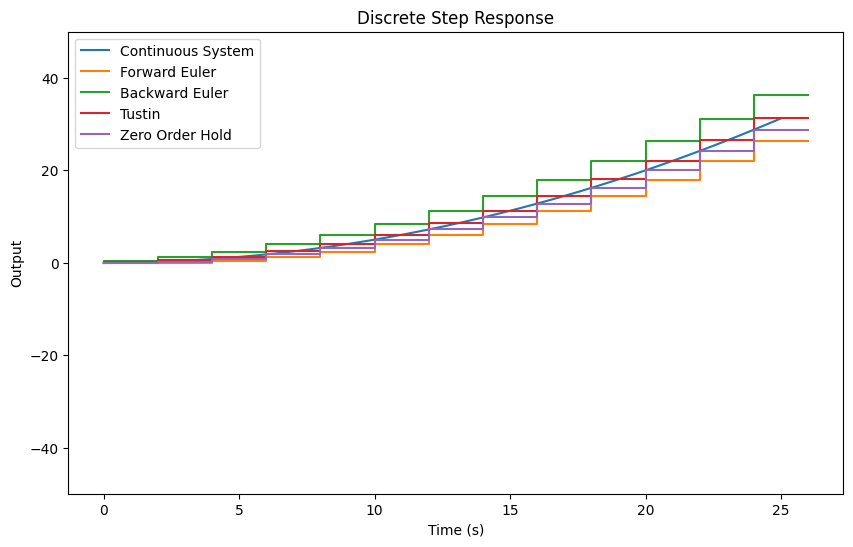

In [5]:
def test_user_implementations(): 
    """
    Test the user's implementation of the step response functions.

    This function tests the user's implementation of the continuous and discrete step response functions.
    It calls the continuous_step_response and various discrete_step_response functions with different methods,
    and plots the step responses using the plot_disc_stepresponses function.

    Parameters:
     - None

    Returns:
     - None
    """

    # Define the sampling time. Feel free to play around with this value.
    Ts = 2 

    # Test the user's implementation. 
    t_cont, y_cont = continuous_step_response(A, B, C, D)
    t_eulerf, y_eulerf = discrete_step_response_euler_forward(A, B, C, D, Ts)
    t_eulerb, y_eulerb = discrete_step_response_euler_backward(A, B, C, D, Ts)
    t_tust, y_tust = discrete_step_response_tustin(A, B, C, D, Ts)
    t_zoh, y_zoh = discrete_step_response_zoh(A, B, C, D, Ts)

    # Plot the step responses.
    discretization.plot_disc_stepresponses(t_cont, y_cont, t_eulerf, y_eulerf, t_eulerb, y_eulerb, t_tust, y_tust, t_zoh, y_zoh, Ts)

    return None
    
Use_User_Implementations = True
if Use_User_Implementations:
    test_user_implementations()
else:
    print("The user's implementations are not being used. Set the Use_User_Implementations variable to True to use the user's implementations.")

## Solution Plots Exercise 1a:

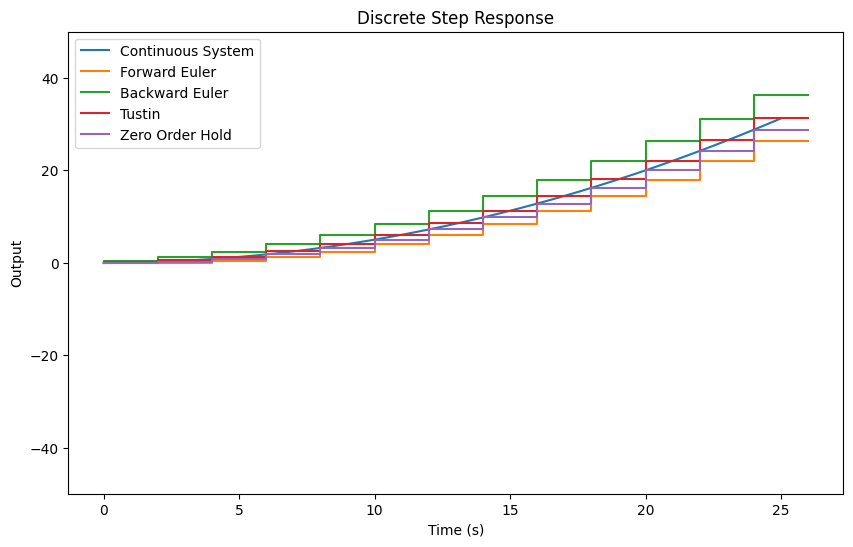

In [9]:
Ts=2

# Call for the solutions and store them.
[t_cont_sol, y_cont_sol] = discretization.cont_solution(A, B, C, D)
[t_eulerf_sol, y_eulerf_sol, t_eulerb_sol, y_eulerb_sol, t_tust_sol, y_tust_sol, t_zoh_sol, y_zoh_sol] = discretization.disc_solution(A, B, C, D, Ts)

# Plot the step responses.
discretization.plot_disc_stepresponses(t_cont_sol, y_cont_sol, t_eulerf_sol, y_eulerf_sol, t_eulerb_sol, y_eulerb_sol, t_tust_sol, y_tust_sol, t_zoh_sol, y_zoh_sol, Ts)

##
Interpret the result (Hint: To see the differences between the different discretizations more clearly, increase `Ts` (more on this in the second part)):

- Which discretization method is closest to the continuous system?
- Why do all the plots diverge?
- Can you show the basic idea behind Zero-Order-Hold in this graph?


-----
Since all of the above step responses diverge, we are unable to demonstrate that the different discretizations can make a stable system unstable. In the next exercise we will stabilize the system using state feedback with pole placement. This is a short teaser of what is to come in the third lecture. You can ignore it for now and think about choosing the poles of your system however you want. We will focus on how different discretization methods affect the stability of the system.

## Exercise 1b:

In this exercise you will:
- Try to make all the discretizations stable via changing the desired poles `p_des` of your system.
- Try to make all the discretizations stable via changing the `Ts`.

Notes: 
- The function as is will not run. To make it run, change the Use_User_Implementation variable to True.
- To start off with, not all the step responses are stable.
- We will reuse the functions defined in 1a. If you couldn't solve them, use `cont_solution` and `disc_solution` where indicated.

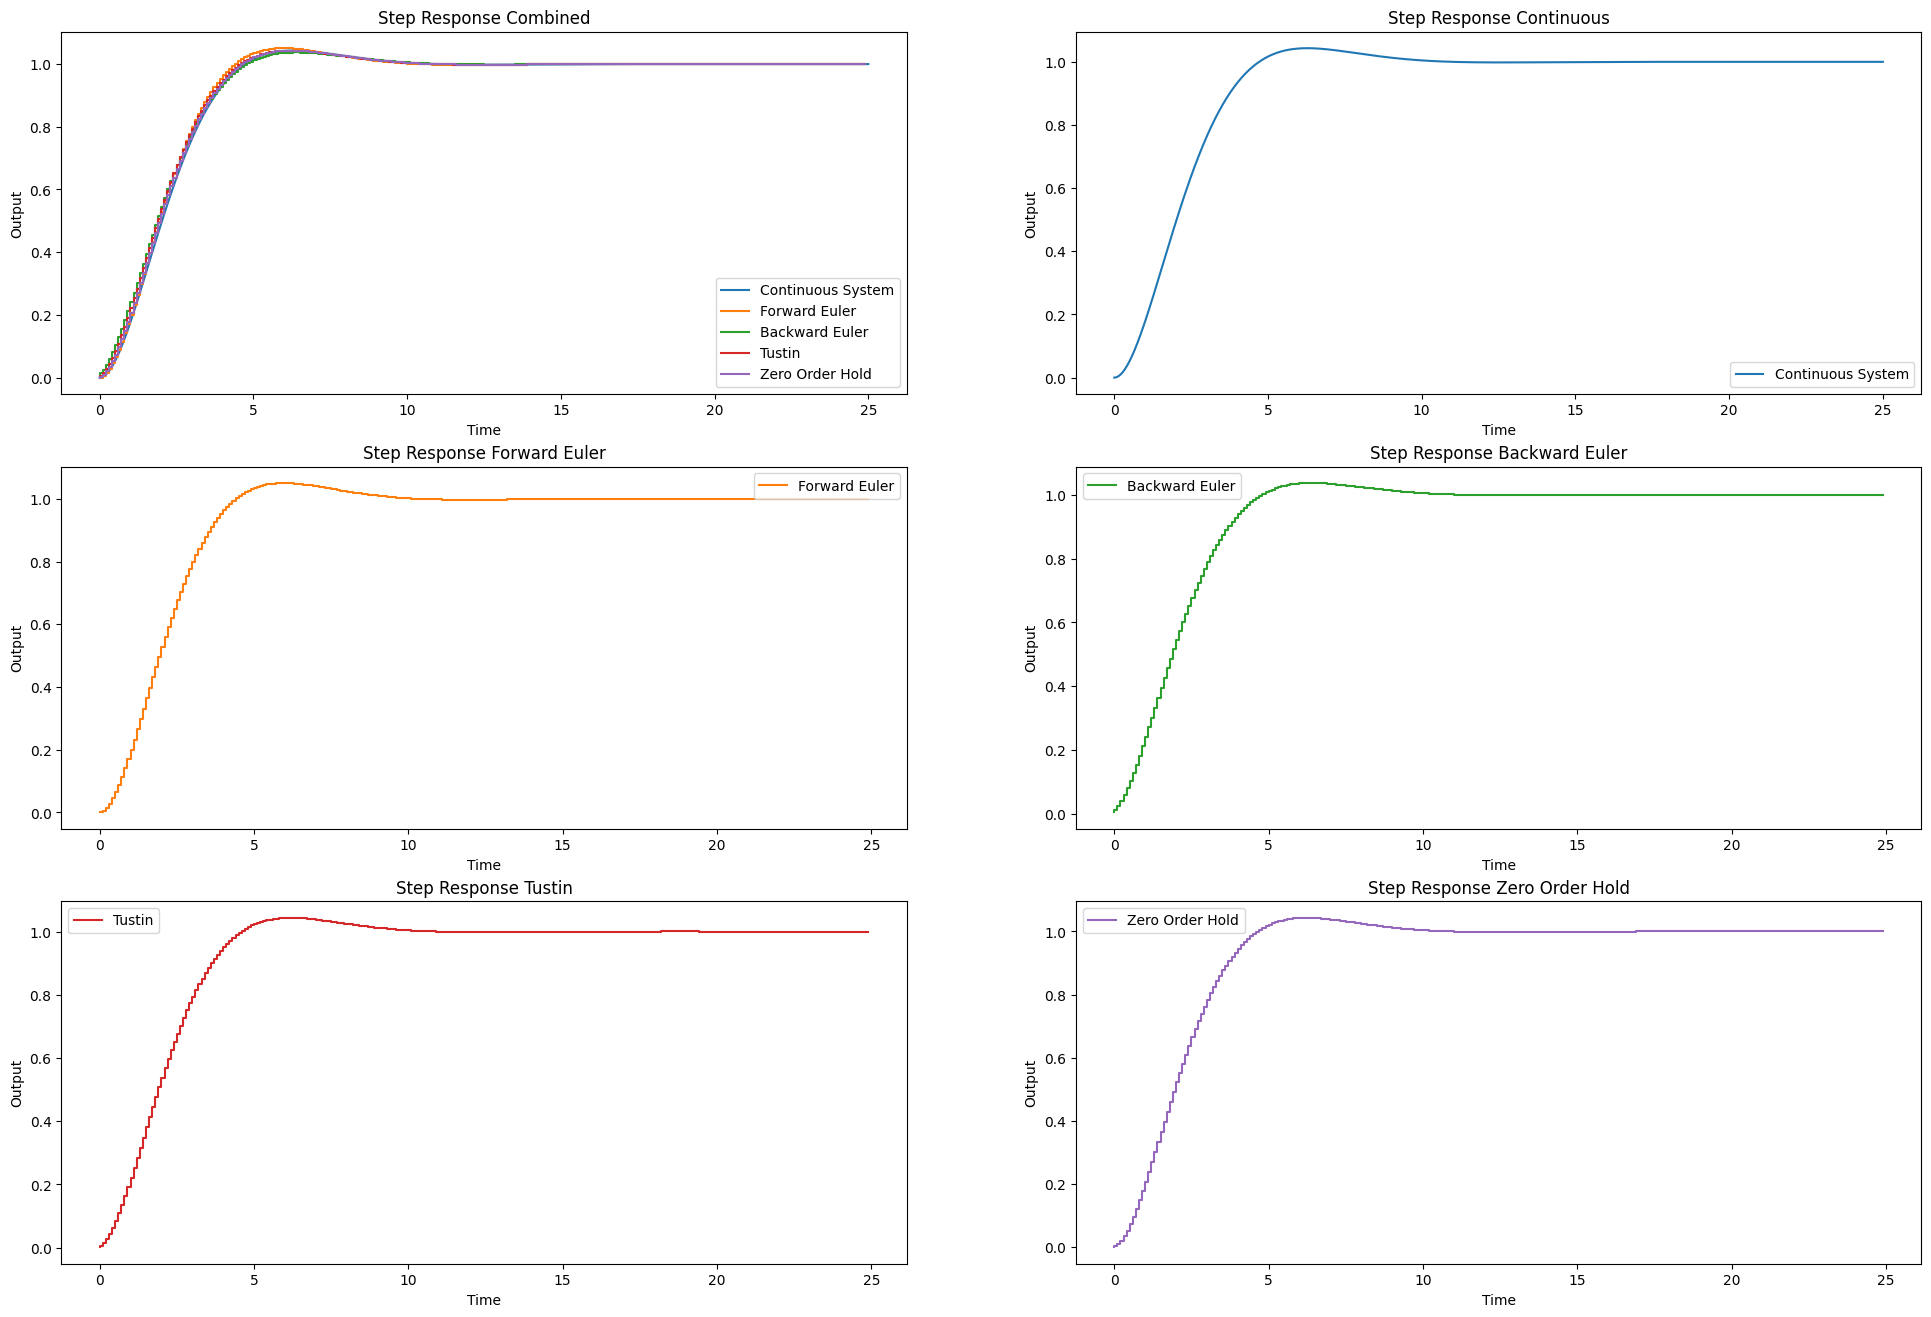

In [41]:
# Choose your desired poles. Feel free to play around with them.
p_des = [-0.5+0.5j, -0.5-0.5j]   

# Define the sampling time. Feel free to play around with this value.
Ts=0.1

# Update the pole locations using the Ackermann formula.
clsys_p = discretization.place_poles_Ackermann(A=A, B=B, C=C, D=0,
                                            poles=p_des)
t_p, y_p = ct.step_response(clsys_p, input=0, output=0)
A_stable = clsys_p.A
B_stable = clsys_p.B
C_stable = clsys_p.C
D_stable = clsys_p.D

Use_User_Implementations = True
if Use_User_Implementations:
     t_stable_cont, y_stable_cont = continuous_step_response(A_stable, B_stable, C_stable, D_stable)
     t_stable_eulerf, y_stable_eulerf = discrete_step_response_euler_forward(A_stable, B_stable, C_stable, D_stable, Ts)
     t_stable_eulerb, y_stable_eulerb = discrete_step_response_euler_backward(A_stable, B_stable, C_stable, D_stable, Ts)
     t_stable_tust, y_stable_tust = discrete_step_response_tustin(A_stable, B_stable, C_stable, D_stable, Ts)
     t_stable_zoh, y_stable_zoh = discrete_step_response_zoh(A_stable, B_stable, C_stable, D_stable, Ts)
else:
    print("The user's implementations are not being used. Set the Use_User_Implementations variable to True to use the user's implementations.")
    [t_stable_cont, y_stable_cont] = discretization.cont_solution(A_stable, B_stable, C_stable, D_stable)
    [t_stable_eulerf, y_stable_eulerf, t_stable_eulerb, y_stable_eulerb, t_stable_tust, y_stable_tust, t_stable_zoh, y_stable_zoh] = discretization.disc_solution(A_stable, B_stable, C_stable, D_stable, Ts)

# Package the values for plotting
values_to_plot = [t_stable_cont, np.squeeze(y_stable_cont),
                    t_stable_eulerf, np.squeeze(y_stable_eulerf),
                    t_stable_eulerb, np.squeeze(y_stable_eulerb),
                    t_stable_tust, np.squeeze(y_stable_tust),
                    t_stable_zoh, np.squeeze(y_stable_zoh)]

# Plot the step responses.
discretization.plot_step_responses(*values_to_plot)

Interpret your findings with respect to the following questions:

- Which of these graphs follows the contiunous system the closest?
- Does that change when you decrease or increase Ts?
- Why does that happen?
- For the default poles, what is the limit for Ts such that no discretization diverges?
- What happens when the poles are outside the unit circle? What happens when they are on it?

----------------
# Introduction to the second part of the Notebook


In digital control and signal processing, selecting the appropriate sampling time $T_s$ for system discretization is crucial for ensuring system performance and stability. This exercise focuses on analyzing the impact of different sampling times on the performance of discretization methods such as Tustin, Euler forward and Euler backward for a specific system. You will gain valuable insights into sampling time selection through simulation and analysis.

## System Library

In here you will find different systems that show the advantages and disadvantages for the three discretization methods.

In [44]:
def create_system1() -> ct.StateSpace:
    A = np.array([[-1, -1],
                  [2, -0.25]])
    B = np.array([[1],
                  [1]])
    C = np.array([[1, 1]])
    D = np.array([[0]])
    return ct.StateSpace(A, B, C, D)

# Feel free to define your own system here.
def create_system2() -> ct.StateSpace:
    A = np.array([[0, 0],
                  [0, 0]])
    B = np.array([[0],
                  [0]])
    C = np.array([[0, 0]])
    D = np.array([[0]])
    return ct.StateSpace(A, B, C, D)

# Create the systems.
system1 = create_system1()
system2 = create_system2()

print(system1.poles())
print(system1.zeros())

[-0.625+1.36358901j -0.625-1.36358901j]
[-1.125+0.j]


-------
## Descretization Methods

You can later return here if you would like to understand the code in depth. These functions define the manual way of discretization as compared to the inbuilt functions seen in exercise 1.

In [45]:
# Discretize using each method
dt_test = 1.0
dt_forward_test = discretization.euler_forward(system1, dt_test)
dt_backward_test = discretization.euler_backward(system1, dt_test)
dt_tustin_test = discretization.tustin_method(system1, dt_test)

`euler_forward(system, dt)`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/discretization.py#L314

`euler_backward(system, dt)`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/discretization.py#L334

`tustin_method(system, dt)`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/discretization.py#L354


-------
## Exercise: Performance Analysis under Varying Time Steps

Objective: Evaluate how the choice of time step affects the performance of each discretization method.

Tasks:

1. Take a look at our systems above and check `system1` which we are discretizing. Also, check the poles on the complex plane as well as the step response.
2. Vary the sampling time (e.g., dt = 0.75, 0.5) in the next console. Plot the responses for different sampling times and compare how each method reacts to changes.
3. Find the biggest sampling time that makes the system become stable for all approximation methods.
4. Why does it make sense that the system becomes stable for all approximation methods with a smaller sampling time?

### Console

This is where you change your system (eg. `system1`, `system2`) and vary the sampling time `dt`.

In [73]:
# Time step for discretization.
dt =  0.001

# Calls the chosen system.
test = system1 # system1 or system2

### Discrete Poles on the Complex Plane

Below you will see all the poles plotted on the complex plane. Remember that in DT a system is stable if the magnitude of all eigenvalues (poles) is less than one.

Eigenvalues of continous system:
[-0.625+1.36358901j -0.625-1.36358901j]


Eigenvalues using Euler Forward
[0.999375+0.00136359j 0.999375-0.00136359j]
Magnitude
0.9993759302684853


Eigenvalues using Euler Backward
[0.99937353+0.00136188j 0.99937353-0.00136188j]
Magnitude
0.9993744624357915


Eigenvalues using Tustin
[0.99937427+0.00136274j 0.99937427-0.00136274j]
Magnitude
0.9993751955418295




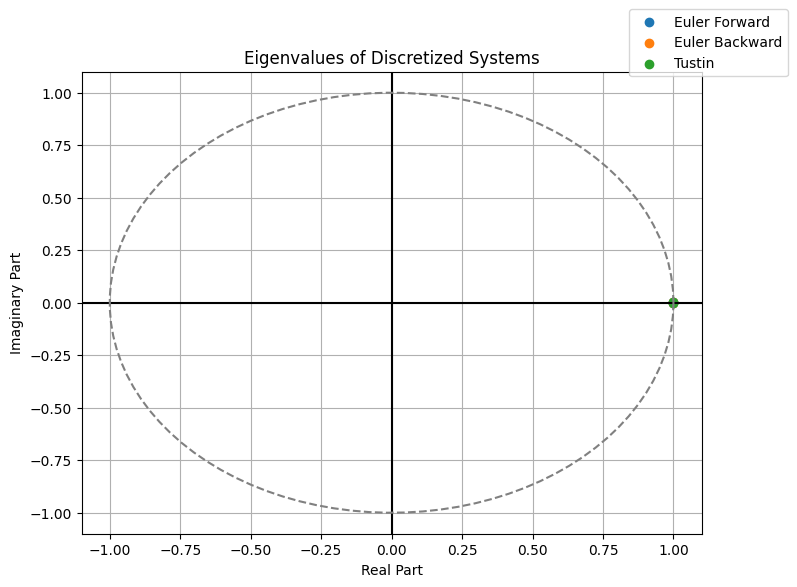

In [74]:
# eigenvalues in continuous time for comparison.
print("Eigenvalues of continous system:")
print(np.linalg.eigvals(test.A))
print("\n")


dt_forward, dt_backward, dt_tustin = discretization.discretize(test, dt)
discretization.plot_table(dt_forward, dt_backward, dt_tustin)

### Insights from the Complex Plane

Using Euler forward, Euler backward, and Tustin’s methods for discretizing a system with a sampling time of `dt = 1`, we saw how these methods affect system stability differently. We found that the `system1` remains stable at a maximum time step of `dt=0.55`. 

We plotted the eigenvalues of these discretized systems on the complex plane, using the unit circle to assess stability. Systems are stable if their eigenvalues are inside the unit circle.

A key takeaway is how the choice of discretization method affects stability. Particularly, the Euler Forward method can turn a stable CT system to a unstable DT system, especially if the system's eigenvalues are near the stability boundary. This shows the need for careful method selection and stability checks after discretization.

### Simulating the Step Response of the Discretized Systems

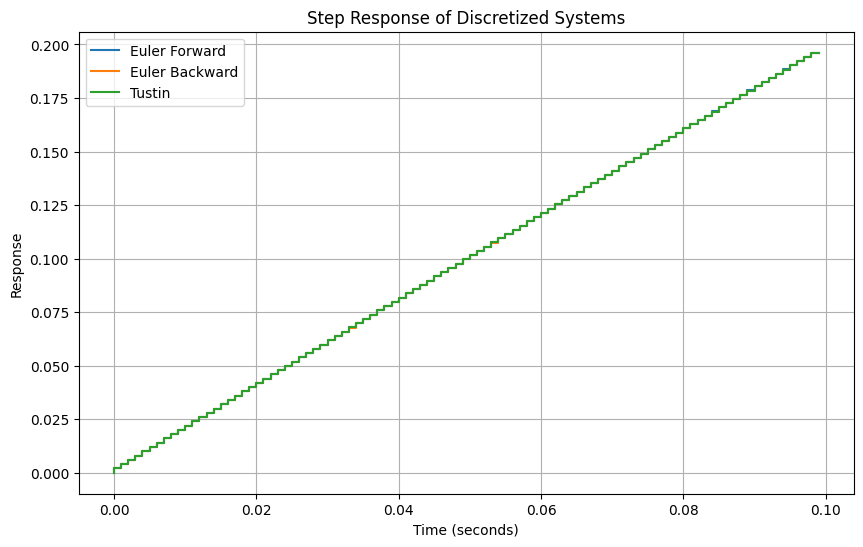

In [75]:
plt.figure(figsize=(10, 6))

# Simulate step response for each method
discretization.simulate_step_response(dt_forward, dt, label='Euler Forward')
discretization.simulate_step_response(dt_backward, dt, label='Euler Backward')
discretization.simulate_step_response(dt_tustin, dt, label='Tustin')

plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.title('Step Response of Discretized Systems')
plt.legend()
plt.grid(True)
plt.show()

## Optional Exercise: Trying out different Systems

Objective: Reapeating the first three exercises and seeing different cases.

Tasks:

1. Create your own system in the system library.
3. Change `system1` to `system2` in the console cell.
2. Repeat this exercise with your system.

*Hint for creating your own system*: Check that your system is observable, by calculating the observability matrix. A non observable system will not show you the "true" step response, since it is not displayable.

-------------
# __Case study:__ Morse Code in Analog and Digital signals <a id="casestudy"></a>

(Bold: __"Key Component"__ Italic: _Signal_)

In the provided image, you can observe the structural overview of our case study. The analysis of the entire system involves dissecting two key components: the __"Sender"__ and the __"Receiver."__

The process begins with the __"Sender"__ inputting _"Text messages"_ as string data into the __"Text to Morse Encryptor"__. This encryptor transforms the text into a combination of _dots and dashes (Morse Code)_.

Subsequently, the encrypted signal is transmitted to the __"Analog Signal Generator"__ via a __"Communication Protocol"__ that defines how dots and dashes should be portrayed as _"ON" and "OFF"_ signals, effectively simulating an analog signal. This signal, infused with _Randomized Noise_ from the environment, departs from the __"Sender"__ and is received by the __"Receiver"__.

Upon reaching the __"Receiver"__, the signal undergoes a sequence of transformations. Initially, it traverses a __"Low-Pass Filter"__ to eliminate high-frequency noise. Following this, the signal is sampled by the __"Analog-to-Digital Converter (ADC)"__, marking the transition from _continuous-time_ to _discrete-time_. The sampled signal is then __normalized__ to 1 and 0, preparing it for processing by the __"Signal Decoder"__. The __"Signal Decoder"__, employing the same "Communication Protocol" as the __"Sender"__, decodes the signal back into _dots and dashes (Morse Code)_.

In the final step, the _Morse Code_ is decrypted to reveal the original _"Text message"_, which is then visible to the __"Receiver"__. 

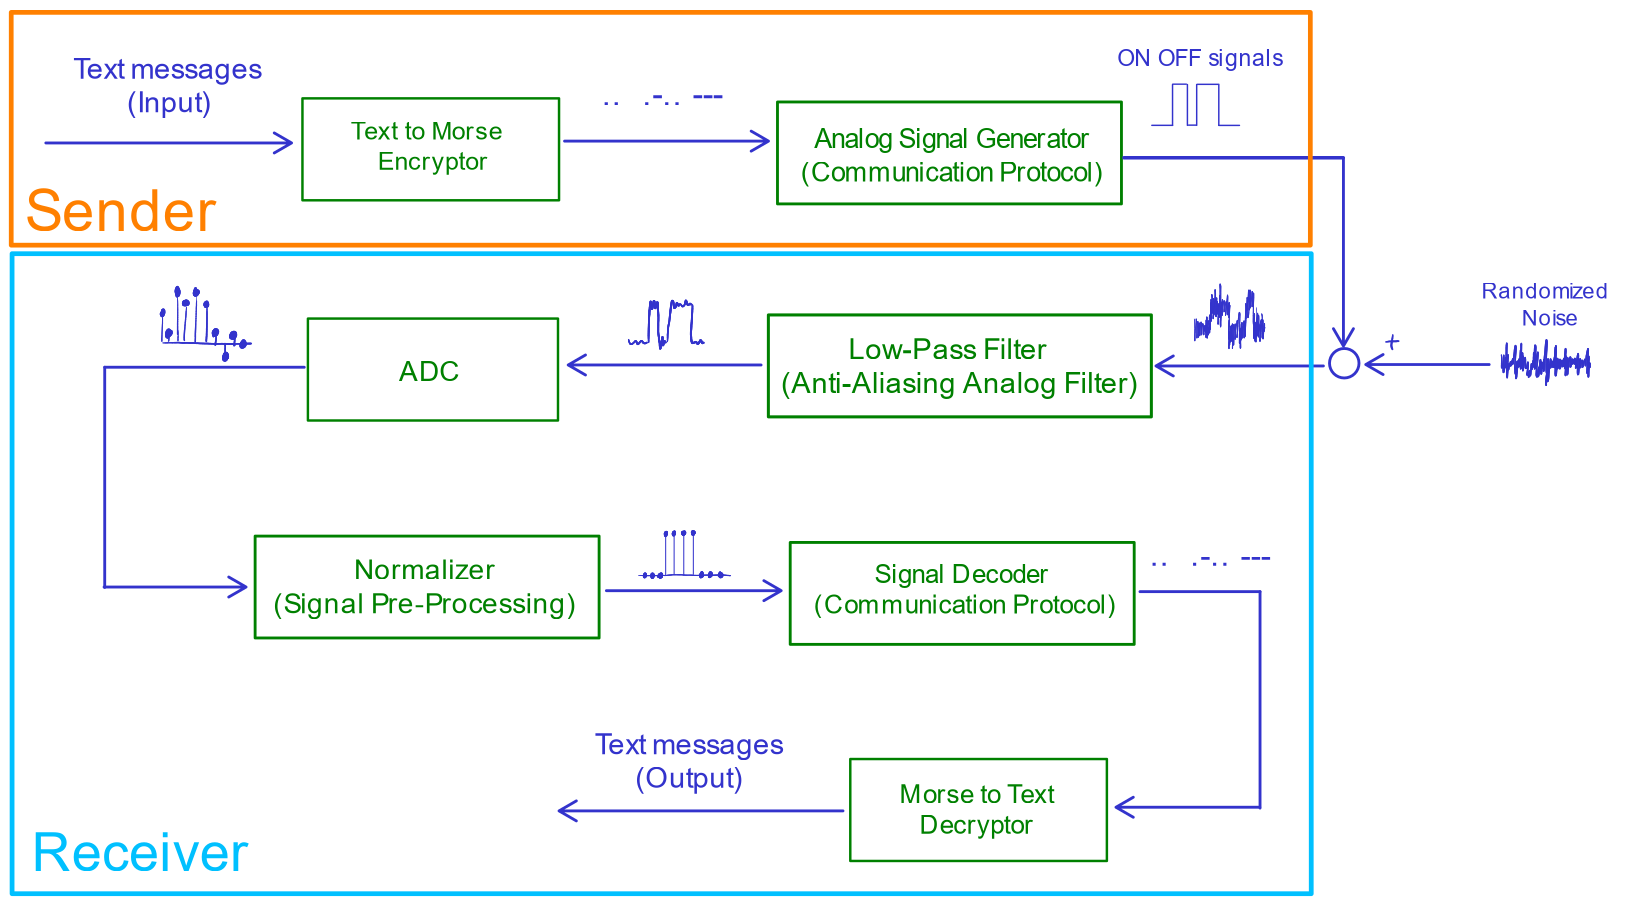

### Necessary Functions for Morse Code and Text Conversion

This Section includes the __"Morse  Encryptor/Decryptor"__ functions.

##### Morse code dictionary
For a full list morse code characters see [here](https://morsecode.world/international/morse2.html).

You can find the morse code dictionary `MORSE_CODE_DICT` here: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L45C1-L45C16

##### Text to Morse Encryptor (function)

`encrypt(message: str)`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L62

##### Morse to Text Decryptor (function)

`decrypt(message: str)`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L82

## __Sender__

In this section, we simulate a message sender. Before everything, we need to define a __Communication (COM) Protocol__

### _Communication Protocol_ (define COM Frequency)

The __"Morse Communication(COM) Frequency"__ sets the minimum duration for the "ON" signal when simulating the analog signal. In simpler terms, it dictates the operational frequency of the __"Analog Signal Generator"__ and, consequently, establishes the data transfer rate.

In [76]:
# Morse communication Frequency in [Hz]. Feel free to change this value.
MORSE_COM_FREQ = 5

Then we define a standardized "ON" & "OFF" analog signal to represent the _Morse Code_


- ".": 1 Interval "ON" followed by 1 Interval "OFF"
- "-": 2 Interval "ON" followed by 1 Interval "OFF"
- " ": 2 Interval "OFF"

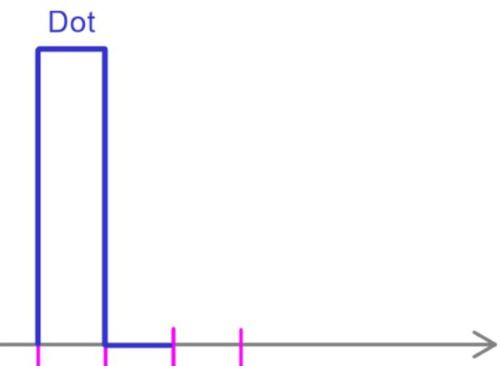

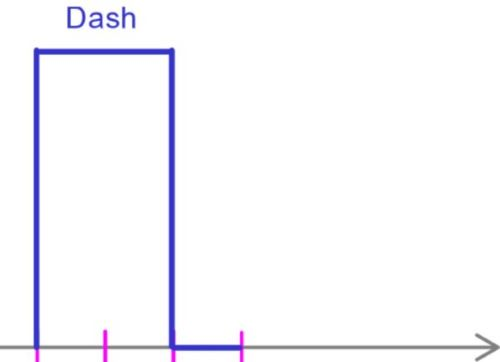

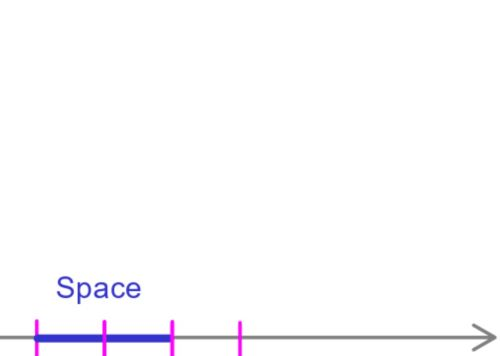

Since both the dot and the dash end in an "OFF" position and start in an "ON" position, any 2 wide space must contain a "Space". This allows us to improve data-transmission rates by shortening the length of "Space" to be 1.

Below are the __"Analog Signal Generator"__ & __"Signal Decoder"__ functions.

`analog_digital_converter()`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L316

`signal_to_code()` = https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L129

Do not touch it! 

In [77]:
""" 
We need a Time Array for us to keep track of the continuous analog signals.
But in the computational world, there's no true continuous time domain.
Everything is eventually in discrete time.

So here we create a 1D-Array for continuous time plotting, "Continues-Time Time Array"
this array will be very big and the time steps between each value will be so small,
smaller than our Morse communication period, so it can be seen as "continues".
"""

# Do not change the code below if you don't know what you are doing!
# Plotting START & END time in [s].
T_CONT_START = 0
T_CONT_END = 15


# Continues Time domain plotting Data storage Frequency in [Hz].
T_CONT_FREQ = 200
# A calculation turns the frequency to the period in [s].
T_CONT_PERIOD = 1/T_CONT_FREQ


# Get the total time.
Time_span = T_CONT_END - T_CONT_START
# Calculate how many elements should be in the Continues Time plotting Data Array and force it to be int.
t_steps = int (Time_span*T_CONT_FREQ)


# Generate an Array for continuous time.
T_CONT = np.linspace(T_CONT_START,T_CONT_END,t_steps + 1)

### __Text Message (Input)__ (type your message in the code)

In [78]:
# Message to send.
TEXT_MESSAGE = "I love CS 2"

### __Text to Morse Encryptor__

We feed the Text Message into the __"Text to Morse Encryptor"__ and turn it into _Morse Code_.

In [79]:
# Morse Code Encryption.
MORSE_CODE_TO_SEND = morse.encrypt(TEXT_MESSAGE.upper())
print(f'The morse code: {MORSE_CODE_TO_SEND}')

The morse code: ..  .-.. --- ...- .  -.-. ...  ..--- 


### __Analog Signal Generator__

We feed the _Morse Code_ into the __"Analog Signal Generator"__. Following the _Communication Protocol_, it generates our _Analog Signal_ to be transmitted.

COM Protocol:
".": 1 Period ON & 1 OFF
"-": 2 ON & 1 OFF
" ": 2 OFF 

MORSE_CODE_TO_SEND:
..  .-.. --- ...- .  -.-. ...  ..--- 


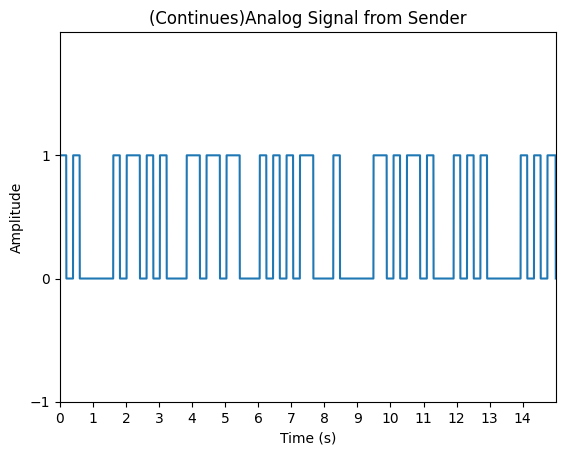

In [80]:
# We defined the code to signal function above in the communication protocol section.
# Morse code to Analog signals
CONT_Morse_Signal_Send = morse.code_to_signal(T_CONT,MORSE_CODE_TO_SEND,MORSE_COM_FREQ)


print("COM Protocol:")
print('".": 1 Period ON & 1 OFF')
print('"-": 2 ON & 1 OFF')
print('" ": 2 OFF','\n')

print("MORSE_CODE_TO_SEND:")
print(MORSE_CODE_TO_SEND)


# Plot out the continuous signal
fig, ax = plt.subplots()
ax.plot(T_CONT,CONT_Morse_Signal_Send)
ax.set_title("(Continues)Analog Signal from Sender")
ax.set(xlim=(T_CONT_START,T_CONT_END),
       xticks=np.arange(T_CONT_START, T_CONT_END),
       ylim=(-0.5, 2),
       yticks=np.arange(-1, 2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## __Transmission and introduction of noise__

In this section, we generate a randomized signal as _Noise_ and add it with the clean analog signal that leaves the __"Sender"__ to better simulate a real noisy world.

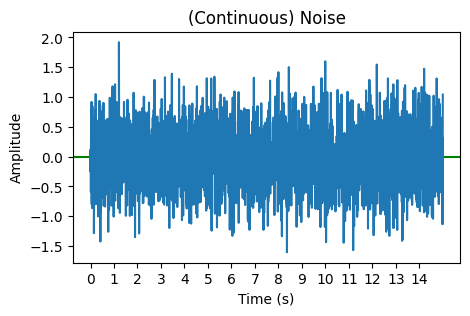

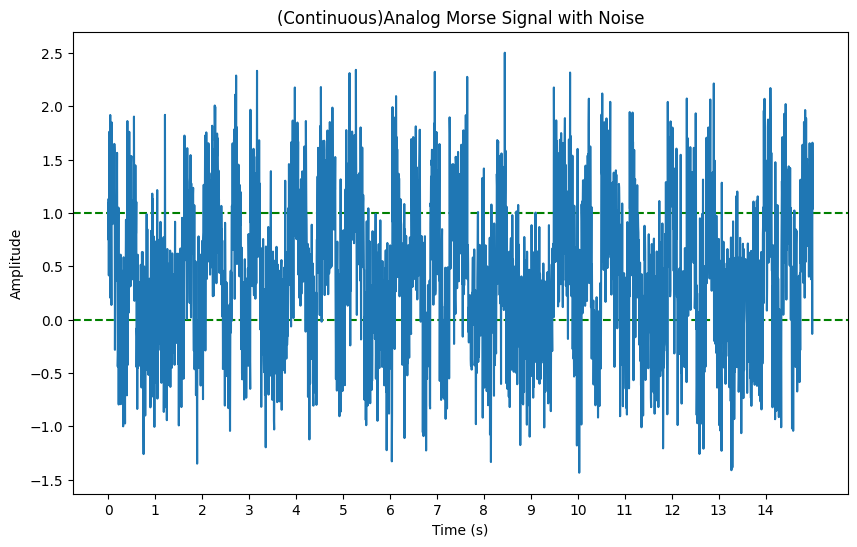

In [81]:
# Using np.random to generate random value as Noise
Randomized_Noise = 0.5 * np.random.normal(size=len(T_CONT))


# Add the Noise with the clean Signal from Sender
CONT_Morse_Signal_w_noise = CONT_Morse_Signal_Send + Randomized_Noise


# Visualize the Noise signal
morse.plot_noise_signal(T_CONT,Randomized_Noise,T_CONT_START,T_CONT_END)


# Plot out the continuous signal with noise introduced
plt.figure(figsize=(10, 6))
plt.title("(Continuous)Analog Morse Signal with Noise")
plt.axhline(y=1, color='g', linestyle='--')
plt.axhline(y=0, color='g', linestyle='--')
plt.plot(T_CONT, CONT_Morse_Signal_w_noise)
# Uncomment the line below to see the original signal without noise
# plt.plot(T_CONT, CONT_Morse_Signal_Send, color='y')
plt.xticks(np.arange(T_CONT_START, T_CONT_END))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## __Receiver__

In this section, we simulate a message receiver. From picking up the analog signal to processing it and finally giving out a message output.

### __Low-Pass Filter (Anti-Aliasing Analog filter)__
When the signal is picked up by the Receiver, it first has to go through a Low-Pass Filter to clean up some of the high-frequency noise.

#### _Low-Pass Filter (function)_
We define a low-pass filter and try to filter out some high-frequency random noise mixed in the signal before we sample it. To do this we used a scipy package filter named "butter"

`butter_lowpass_filter()`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L292

#### __Low-Pass Filter__ (define cutoff frequency)

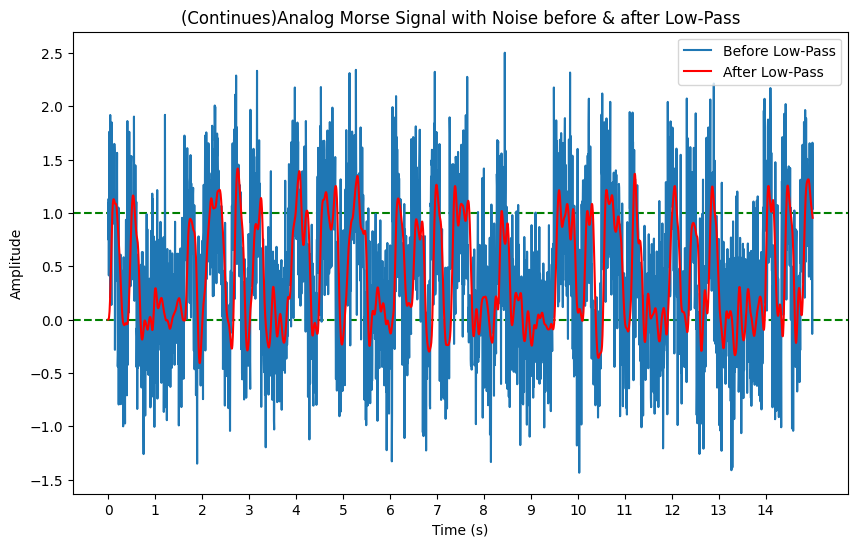

In [82]:
# Set the cutoff frequency for the low-pass filter. Adjust this based on your requirements.
CUTOFF_FREQ = 7  


# Apply the low-pass filter.
after_low_pass = morse.butter_lowpass_filter(CONT_Morse_Signal_w_noise, 
                                       CUTOFF_FREQ, 
                                       T_CONT_FREQ, 
                                       4)

# Plot out the continuous signal with noise introduced and compare it with the signal that is after low-Pass filter.
plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='g', linestyle='--')
plt.axhline(y=1, color='g', linestyle='--')
plt.title("(Continues)Analog Morse Signal with Noise before & after Low-Pass")
plt.plot(T_CONT, CONT_Morse_Signal_w_noise, label='Before Low-Pass')
plt.plot(T_CONT, after_low_pass, 'r' ,label='After Low-Pass')
plt.xticks(np.arange(T_CONT_START, T_CONT_END))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

We can see the improvement if we tune the Low-Pass Filter right. From here, we can recognize roughly the "Dot" and "Dash", which were represented by long and short signals.  

### __Analog to Digital Converter (ADC)__
After we filter out some noise signals, they can then be sampled by the ADC and turn the continuous signal into discrete signal data.

#### _ADC (function)_
This Section defines our ADC function. Notice that the output Discrete-Time 1D-Array is typically smaller than the input Continues-Time Arrays. 

`analog_digital_converter()`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L316

#### __ADC__ (define sampling frequency)

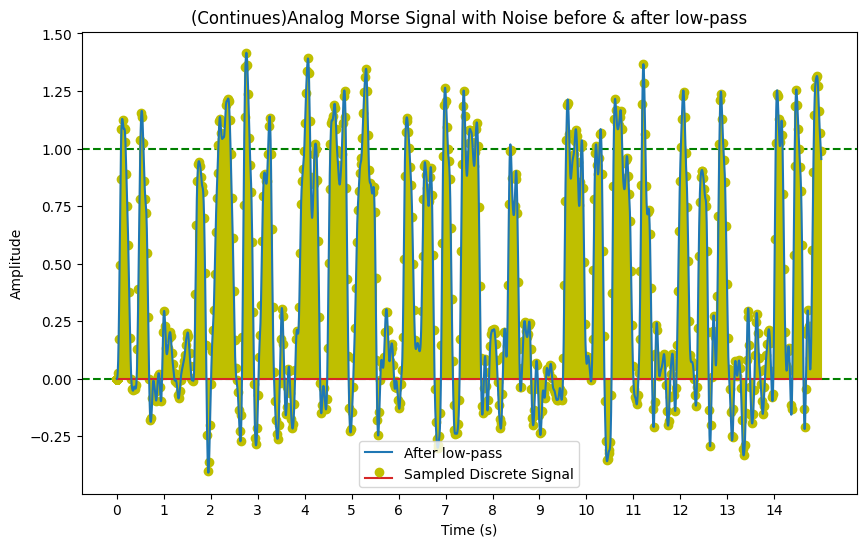

In [83]:
# Define the sampling frequency of your Receiver (Analog to Digital converter) in [Hz].
SAMPLING_FREQ = 50


# First generate a Discrete-Time Time Array: 1D-Array.
T_DIS_Morse = morse.analog_digital_converter(T_CONT,
                                       after_low_pass,
                                       SAMPLING_FREQ,
                                       "t")

# Then generate a Discrete-Time Signal value Array: 1D-Array.
DIS_Morse_Signal_w_N_Raw = morse.analog_digital_converter(T_CONT,
                                                    after_low_pass,
                                                    SAMPLING_FREQ,
                                                    "s")


# Plot out the continuous signal with noise introduced.
plt.figure(figsize=(10, 6))
plt.axhline(y=1, color='g', linestyle='--')
plt.axhline(y=0, color='g', linestyle='--')
plt.title("(Continues)Analog Morse Signal with Noise before & after low-pass")
plt.stem(T_DIS_Morse, DIS_Morse_Signal_w_N_Raw, 'y' ,label='Sampled Discrete Signal')
plt.plot(T_CONT, after_low_pass, label='After low-pass')
plt.xticks(np.arange(T_CONT_START, T_CONT_END))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

_"Continues-Time Signal"_ is represented by the continuous line, while sampled signal, _"Discrete-Time Signal"_ is represented by the Points.

###  __Normalizer__ <a id="normalizer"></a>

After we sampled the analog signal, it is now discrete values instead of continuous. Noticed that the values are anywhere between "-1" to "2". Before we start to decode the discrete signal to _Morse Code_, we need to normalize it to "1" and "0". So the decoder can have an easy time decoding the signal to _Morse Code_.

#### _Normalizer (function)_

`data_normalization_sol()`: https://github.com/idsc-frazzoli/cs2solutions/blob/751e11a73d880acacd97b446db3d7badeca30585/src/cs2solutions/morse.py#L372

#### __Normalizer__ (define Threshold)

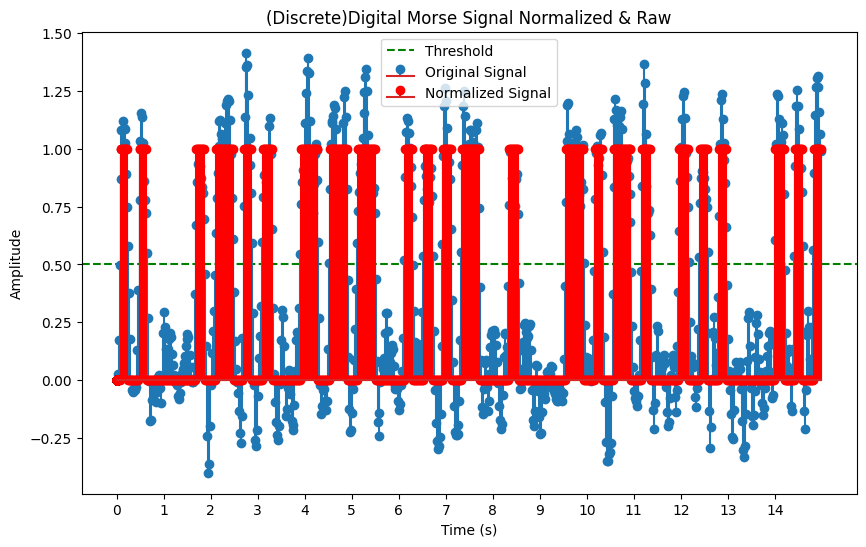

In [84]:
# Apply the Normalizer to the raw discrete signal data.
DIS_Morse_Signal_w_N_Normalized = morse.data_normalization_sol(DIS_Morse_Signal_w_N_Raw,
                                                         0.6,
                                                         1,
                                                         0)


# Plot out the normalized discrete signal data and compare it with raw data.
plt.figure(figsize=(10, 6))
plt.axhline(y=0.5, color='g', linestyle='--', label= 'Threshold')
plt.title("(Discrete)Digital Morse Signal Normalized & Raw")
plt.stem(T_DIS_Morse, DIS_Morse_Signal_w_N_Raw, label='Original Signal')
plt.stem(T_DIS_Morse, DIS_Morse_Signal_w_N_Normalized, 'r' ,label='Normalized Signal')
plt.xticks(np.arange(T_CONT_START, T_CONT_END))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### __Signal Decoder__

In [85]:
# This feed the normalized signal to the signal decoder.
CODE_Received_I = morse.signal_to_code(T_DIS_Morse,DIS_Morse_Signal_w_N_Normalized,MORSE_COM_FREQ)

# This bypass the normalization and directly feed to the signal decoder.
CODE_Received_II = morse.signal_to_code(T_DIS_Morse,DIS_Morse_Signal_w_N_Raw,MORSE_COM_FREQ)

print("Received signal filtered decrypted to Code:")
print(CODE_Received_I)


Received signal filtered decrypted to Code:
..  .-.. --- ...- .  -.-. ...  ..


### __Morse To Text Decryptor__

In [86]:
#print("Received signal filtered decrypted to Code:")
#print(CODE_Received_I)
print("TEXT MESSAGE (Output):")
print(morse.decrypt(CODE_Received_I))

TEXT MESSAGE (Output):
I LOVE CS I


(It's an Easter egg, the input is I LOVE CS 2, But it came out as I LOVE CS I stating a joke here. xD But think about, why does it happen?)

# __Exercise__

## Nyquist Frequency

Validation of the __"Nyquist Frequency"__ and finding the minimum Sampling frequency that guarantees a correct message decryption.

In [90]:
# You can define these values and play around with them.

# COM Protocol.
# Morse communication Frequency in [Hz] 
# default (5)
Ex_MORSE_COM_FREQ = 5


# Message to send.
# default ("I CAN DO CS II")
Ex_MESSAGE = "I CAN DO CS II"

#### Perfect condition

Which minimum sampling frequency do you observe? When there's no noise in the received signal?

In [97]:
# ADC Sampling Frequency in [Hz]
# default (10)
Ex_SAMPLING_FREQ_PERF = 10


# Feed the Text input to Encryptor and then generate it to the Analog Signal.
# Generate the Morse Signal in continues-time (CONT).
Ex_CONT_Morse_Signal_Send = morse.code_to_signal(T_CONT, morse.encrypt(Ex_MESSAGE), Ex_MORSE_COM_FREQ)



# Direct feed to ADC, since there is no noise, it doesn't matter.
# Sampled by ADC.
# Generate Time Data.
Ex_T_DIS_Morse = morse.analog_digital_converter(T_CONT,
                                          Ex_CONT_Morse_Signal_Send,
                                          Ex_SAMPLING_FREQ_PERF,
                                          "t")

# Sample the Signal.
Ex_DIS_Morse_Signal_Raw = morse.analog_digital_converter(T_CONT,
                                                   Ex_CONT_Morse_Signal_Send,
                                                   Ex_SAMPLING_FREQ_PERF,
                                                   "s")


# Decode signal to Morse.
Ex_CODE_Received = morse.signal_to_code(Ex_T_DIS_Morse,
                                  Ex_DIS_Morse_Signal_Raw,
                                  Ex_MORSE_COM_FREQ)


# Decrypt Morse to message.
print("Message received:")
print(morse.decrypt(Ex_CODE_Received))

Message received:
I CAN DO CI


#### Plotting

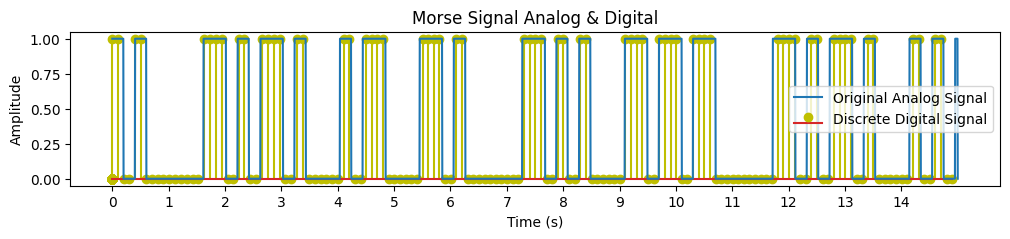

In [98]:
plt.figure(figsize=(12, 2))
plt.title("Morse Signal Analog & Digital")
plt.stem(Ex_T_DIS_Morse, Ex_DIS_Morse_Signal_Raw, 'y', label='Discrete Digital Signal')
plt.plot(T_CONT, Ex_CONT_Morse_Signal_Send, label='Original Analog Signal')
plt.xticks(np.arange(T_CONT_START, T_CONT_END))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#### Noise Condition (__Exercise in this Section__)

Now we introduce a random noise to the signal.

##### Without any pre-processing

In [99]:
# ADC Sampling Frequency in [Hz].
# default (15)
Ex_SAMPLING_FREQ_NOISE = 15

# Low-Pass Cutoff Frequency in [Hz].
# default (10)
# This should be higher than the Morse-COM Frequency.
Ex_LOW_PASS_CUTOFF_FREQ = 10


# Feed the Text input to Encryptor and then generate it to the Analog Signal.
# Generate the Morse Signal in continues-time (CONT) with random noise.
Ex_CONT_Morse_Signal_w_noise = morse.code_to_signal(T_CONT,
                                              morse.encrypt(Ex_MESSAGE),
                                              Ex_MORSE_COM_FREQ)+ 0.5 * np.random.normal(size=len(T_CONT))


# Feed through anti-aliasing(low-pass) filter before feed into ADC.
Ex_CONT_Morse_Signal_w_noise_af_low_pass = morse.butter_lowpass_filter(Ex_CONT_Morse_Signal_w_noise,
                                                                 Ex_LOW_PASS_CUTOFF_FREQ,
                                                                 T_CONT_FREQ,
                                                                 3)


# Sampled by ADC.
# Generate Time Data.
Ex_T_DIS_Morse = morse.analog_digital_converter(T_CONT,
                                          Ex_CONT_Morse_Signal_w_noise_af_low_pass,
                                          Ex_SAMPLING_FREQ_NOISE,
                                          "t")

# Sample the Signal.
Ex_DIS_Morse_Signal_Raw = morse.analog_digital_converter(T_CONT,
                                                   Ex_CONT_Morse_Signal_w_noise_af_low_pass,
                                                   Ex_SAMPLING_FREQ_NOISE,
                                                   "s")


# Decode signal to Morse.
Ex_CODE_Received = morse.signal_to_code(Ex_T_DIS_Morse,
                                  Ex_DIS_Morse_Signal_Raw,
                                  Ex_MORSE_COM_FREQ)


# Decrypt Morse to message. (Without Pre-Processing)
"""""
Notice:
The following lines can cause problems due to noise feeding into the decryption.
Decrypt Morse to message. (Without Post-Processing) under huge noise conditions
is impossible.
Therefore, the following lines are commented.

Instead, we compare the Morse code between sent and received.
"""

#print("Message received:")
#print(decrypt(Ex_CODE_Received))

print("Code sent:")
print(morse.encrypt(Ex_MESSAGE))

print("Code received:")
print(Ex_CODE_Received)


Code sent:
..  -.-. .- -.  -.. ---  -.-. ...  .. .. 
Code received:
..  ..-. .. ..  -.. ..--  -- .


We observe that as soon as there's a noise in the signal, our decryption struggles to get the correct message. Because the __Signal Decoder__ using "1" and "0" and the period in between to decode the signal back to _Morse Code_, but our signal here contains values between 1 and 0 even after the __Low-Pass Filter__.
Here we see the importance of a filter and signal normalization for post-computation (decryption). 

#### Plotting

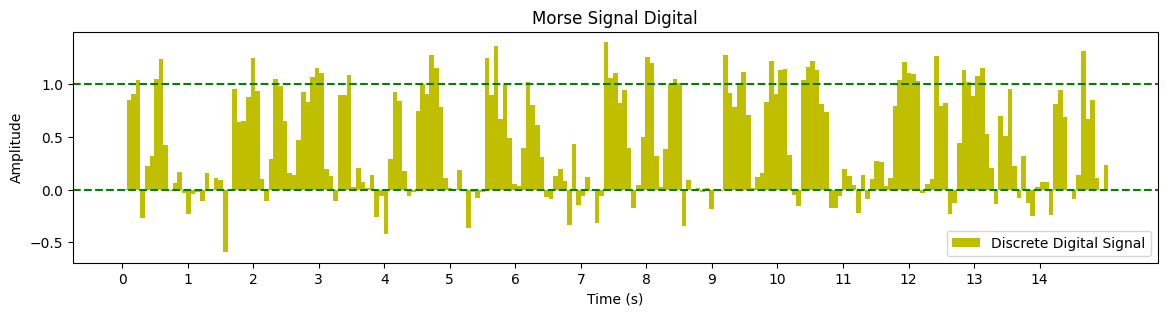

In [100]:
plt.figure(figsize=(14, 3))
plt.title("Morse Signal Digital")
plt.axhline(y=1, color='g', linestyle='--')
plt.axhline(y=0, color='g', linestyle='--')

# Uncomment the following line to see a different plotting style for discrete signal
#plt.stem(Ex_T_DIS_Morse, Ex_DIS_Morse_Signal_Raw, 'y', label='Discrete Digital Signal')

# Uncomment the following line to see the signal in continues-time domain.
#plt.plot(T_CONT, Ex_CONT_Morse_Signal_w_noise_af_low_pass,'c', label='Analog Signal')

width_ksczeiv = Ex_T_DIS_Morse[1] - Ex_T_DIS_Morse[0]
plt.bar(Ex_T_DIS_Morse, Ex_DIS_Morse_Signal_Raw, align='edge', width=width_ksczeiv, color='y', linewidth=1, label='Discrete Digital Signal')

plt.xticks(np.arange(T_CONT_START, T_CONT_END))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

##### __Your code here (Exercise)__ 

Now implement a function to normalize the data. If you need help, feel free to look at the function above. In __Case Study__ the section: __Normalizer__

In [102]:
def ex_data_normalization(data_raw: np.array,
                          min: float,
                          normalization: float,
                          idle: float) -> np.array:
    """
    This function normalizes the input data by setting values below the minimum threshold to the idle value,
    and values above the threshold to the normalization value.
    
    Args:
     - ``data_raw`` (np.array): 1-D array of raw data.
     - ``min`` (float): Minimum threshold.
     - ``normalization`` (float): Value to normalize to after reaching the threshold.
     - ``idle`` (float): Value to set when data is lower than the threshold.
        
    Returns:
     - ``np.array``: 1-D array of filtered data, with the same size as the raw data array.
    """
    # Create an array to save the filtered data with the same size as the raw data array.
    data_norm = np.zeros(data_raw.size)
    
    # Check each value and normalize or set it to idle value in the filtered data array.
    # Your code here ---------------------------------------------------------------------------

    for i in range(data_raw.size):
        if data_raw[i] < min:
            data_norm[i] = idle
        else:
            data_norm[i] = normalization
    
    return data_norm

# Your code here ---------------------------------------------------------------------------




##### With post-processing (__Code Modification needed__)

The first function is the solution. "Ex_DIS_Morse_Signal_Normalized = data_normalization_sol(Ex_DIS_Morse_Signal_Raw,0.5,1,0)". You need to implement your function below in able to see your test result.

In [ ]:
# Run the Normalized function.
# Fine-tune the threshold to make sure a correct Message decryption.
Ex_DIS_Morse_Signal_Normalized = morse.data_normalization_sol(Ex_DIS_Morse_Signal_Raw,0.5,1,0)



"""
 Uncomment the lines below and implement your function. 
 Once you implement the function, it overwrite the solution value and
 it plot out your results.
"""

# Your Code here-----------------------------------------------------------------------------------
# Ex_DIS_Morse_Signal_Normalized = ex_data_normalization().



# Your Code here-----------------------------------------------------------------------------------



# Decode signal to Morse.
Ex_CODE_Received = morse.signal_to_code(Ex_T_DIS_Morse,
                                  Ex_DIS_Morse_Signal_Normalized,
                                  Ex_MORSE_COM_FREQ)


# Decrypt Morse to message.
print("Message received:")
print(morse.decrypt(Ex_CODE_Received))

## Data transfer rate

We noticed that in the Nyquist Frequency section, using default values:


Morse communication Frequency: 5 [Hz]


Nyquist Frequency: 10 [Hz]


Message to send: "I CAN DO CS II"


ADC Sampling Frequency 20 [Hz]


We can not send the full message.


Think about how can you increase the data transfer rate.

### Increase operating and sampling Frequency (__Exercise in this Section__)

#### Adjust the Morse-COM frequency and define a message to send
Adjust the __"Morse-communication protocol frequency"__ (Ex_MORSE_COM_FREQ_II) to a higher value. You can imagine that: instead of speaking a sentence slowly, now we speak it fast so we can finish speaking the whole sentence in a shorter time. Thus in the same given time as before, we can pass on more information.

In [ ]:
# You can define these values and play around with them.

# COM Protocol
# Morse communication Frequency in [Hz]
# Before (5)
# default (20)
Ex_MORSE_COM_FREQ_II = 20


# Message to send
Ex_MESSAGE_II = "I CAN DO CS II and beyond"

#### Simulation Run & Results (__Exercise in this Section__)
Now we run through the steps:


1. Generate an analog signal with (code_to_signal).


2. And use our predefined ADC (analog_digital_converter) to sample the signal.


3. Decode that sampled signal to Morse code (signal_to_code).


4. And finally, decrypt the Code to the Message (decrypt(...)).

In [ ]:
# ADC Sampling Frequency in [Hz]
# Before (20)
# default (200)
Ex_SAMPLING_FREQ_II = 200


# Feed the Text input to Encryptor and then generate it to the Analog Signal
# Generate the Morse Signal in continues-time (CONT)
Ex_CONT_Morse_Signal_Send_II = morse.code_to_signal(T_CONT, morse.encrypt(Ex_MESSAGE_II.upper()), Ex_MORSE_COM_FREQ_II)


# Direct feed to ADC, since there is no noise, it doesn't matter
# Sampled by ADC
# Generate Time Data
Ex_T_DIS_Morse_II = morse.analog_digital_converter(T_CONT,
                                          Ex_CONT_Morse_Signal_Send_II,
                                          Ex_SAMPLING_FREQ_II,
                                          "t")
# Sample the Signal
Ex_DIS_Morse_Signal_Raw_II = morse.analog_digital_converter(T_CONT,
                                                   Ex_CONT_Morse_Signal_Send_II,
                                                   Ex_SAMPLING_FREQ_II,
                                                   "s")


# Decode signal to Morse
Ex_CODE_Received_II = morse.signal_to_code(Ex_T_DIS_Morse_II,
                                  Ex_DIS_Morse_Signal_Raw_II,
                                  Ex_MORSE_COM_FREQ_II)


# Decrypt Morse to message.
print("Code sent:")
print(morse.encrypt(Ex_MESSAGE_II.upper()))
print("Message received:")
print(Ex_CODE_Received_II)
print(morse.decrypt(Ex_CODE_Received_II))

Now compare with the result before in part "Nyquist Frequency". There we receive a sentence of "I CAN DO C" in 15 [s]. While here, after we increase the Morse-COM protocol frequency, we can receive a full sentence of "I CAN DO CS II AND BEYOND" in the same 15 [s].

### Limitation (__Exercise in this Section__)
Why can't we just keep increasing the Morse-COM protocol frequency to the extreme to pass massive data volume?

What could be the potential limitations? And why Fiber-Optic is faster than Ethernet cable?

Here in this section, we gonna see why.

#### Redefine the _Morse-COM Protocol_ Frequency
Here we push the frequency even higher to observe high frequency behavior.

In [ ]:
# You can define these values and play around with them.

# Morse communication Frequency in [Hz]
# Before (20)
# default (100000)
Ex_MORSE_COM_FREQ_H = 100000


# Message to send
Ex_MESSAGE_H = "I CAN DO CS II and beyond"

#### Redefine the plotting Span
To observe the high-frequency behavior, we have to zoom in in time. Here we redefine our plotting span to match the purpose. Change the plotting time from 0 to 1 [s]. While increasing the data plotting resolution to 100 [kHz]. Higher the resolution while also increasing the frequency.

In [ ]:
# Do not change the code below if you don't know what you are doing!
# Plotting START & END time in [s]
T_CONT_START_H = 0
T_CONT_END_H = 0.0001


# Continues Time domain plotting Data storage Frequency in [Hz]
# default (200000000)
T_CONT_FREQ_H = 200000000
# A calculation turns the frequency to the period in [s]
T_COUNT_PERIOD_H = 1/T_CONT_FREQ_H


# Get the total time
Time_span_H = T_CONT_END_H - T_CONT_START_H
# Calculate how many elements should be in the Continues Time plotting Data Array
# And force it to be int.
t_steps_h = int (Time_span_H*T_CONT_FREQ_H)


# Generate an Array for continuous time
T_CONT_H = np.linspace(T_CONT_START_H,T_CONT_END_H,t_steps_h + 1)

#### Copper wire model
Here we use a Low-Pass filter from before as a model of a copper wire. Documentation of this Low-Pass Filter can be found on:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html 

In [ ]:
def butter_lowpass_filter_H(data: np.array,
                            cutoff_frequency: float,
                            sampling_frequency: float,
                            order: int) -> np.array:
    """
    This function applies a low-pass filter to the input data using a Butterworth filter. It is meant to simulate the parastic effect of the wire.
    
    Args:
     - ``data`` (np.array): 1-D array of input data.
     - ``cutoff_frequency`` (float): Cutoff frequency of the filter in Hz.
     - ``sampling_frequency`` (float): Sampling frequency of the data in Hz.
     - ``order`` (int): Order of the filter.
        
    Returns:
     - ``y`` np.array: 1-D array of filtered data, with the same size as the input data array.
    """
    nyquist = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

#### Simulation Run & Results (__Exercise in this Section__)

In [ ]:
# ADC Sampling Frequency in [Hz]
# Before (200)
# default (1000000)
Ex_SAMPLING_FREQ_H = 1000000


# Feed the Text input to Encryptor and then generate it to the Analog Signal
# Generate the Morse Signal in continues-time (CONT)
Ex_CONT_Morse_Signal_Send_H = morse.code_to_signal(T_CONT_H,
                                             morse.encrypt(Ex_MESSAGE_H.upper()),
                                             Ex_MORSE_COM_FREQ_H)


# Apply the copper wire as a low-pass filter with a cutoff frequency in [Hz]
# default(100000)
CUTOFF_FREQ_H = 100000
after_copper_wire = butter_lowpass_filter_H(Ex_CONT_Morse_Signal_Send_H,
                                            CUTOFF_FREQ_H,
                                            T_CONT_FREQ_H,
                                            2)


# Sampled by ADC
# Generate Time Data
Ex_T_DIS_Morse_H = morse.analog_digital_converter(T_CONT_H,
                                          after_copper_wire,
                                          Ex_SAMPLING_FREQ_H,
                                          "t")
# Sample the Signal
Ex_DIS_Morse_Signal_Raw_H = morse.analog_digital_converter(T_CONT_H,
                                                   after_copper_wire,
                                                   Ex_SAMPLING_FREQ_H,
                                                   "s")

In [ ]:
plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='g', linestyle='--')
plt.axhline(y=1, color='g', linestyle='--')
plt.title("(Continues)Analog Morse Signal High-Frequency low-pass response")
plt.plot(T_CONT_H, after_copper_wire)
plt.stem(Ex_T_DIS_Morse_H,Ex_DIS_Morse_Signal_Raw_H)

# Two lines below are simulating how 0-order-hold would look like
width_uezhc = Ex_T_DIS_Morse_H[1] - Ex_T_DIS_Morse_H[0]
plt.bar(Ex_T_DIS_Morse_H, Ex_DIS_Morse_Signal_Raw_H, align='edge', width=width_uezhc, color='y', linewidth=1, label='Discrete Digital Signal')

plt.xticks(np.linspace(0, 0.0001, 11))
plt.ylim(-0.5,1.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### Repeat the simulation and raise the __Morse-COM Frequency__
Raise the COM-Frequency (Ex_MORSE_COM_FREQ_H) higher step by step.
e.g. 


300'000 


400'000


500'000


...


And plot out the data to see the effects of the low-pass wire on limiting our data transfer rate.

In [ ]:
# Morse communication Frequency in [Hz]
# Before (100000)
# default (2*100000)
Ex_MORSE_COM_FREQ_H_II = 2*100000


# ADC Sampling Frequency in [Hz]
# Before (200)
# default (1000000)
Ex_SAMPLING_FREQ_H_II = 1000000



# Generate the Morse Signal in continues-time (CONT)
Ex_CONT_Morse_Signal_Send_H_II = morse.code_to_signal(T_CONT_H, morse.encrypt(Ex_MESSAGE_H.upper()), Ex_MORSE_COM_FREQ_H_II)

# Apply the copper wire as a low-pass filter with cutoff frequency in [Hz]
# default(100000)
CUTOFF_FREQ_H_II = 100000
after_copper_wire_II = butter_lowpass_filter_H(Ex_CONT_Morse_Signal_Send_H_II,CUTOFF_FREQ_H_II,T_CONT_FREQ_H,2)


# Sampled by ADC
# Generate Time Data
Ex_T_DIS_Morse_H_II = morse.analog_digital_converter(T_CONT_H,
                                          after_copper_wire_II,
                                          Ex_SAMPLING_FREQ_H_II,
                                          "t")
# Sample the Signal
Ex_DIS_Morse_Signal_Raw_H_II = morse.analog_digital_converter(T_CONT_H,
                                                   after_copper_wire_II,
                                                   Ex_SAMPLING_FREQ_H_II,
                                                   "s")


In [ ]:
# Uncomment or comment some of the lines to see different style of plotting
plt.figure(figsize=(10, 6))
#plt.axhline(y=0, color='g', linestyle='--')
#plt.axhline(y=1, color='g', linestyle='--')
plt.title("(Continues)Analog Morse Signal High-Frequency Low-Pass response")
plt.plot(T_CONT_H, after_copper_wire_II, 'r' ,label="After Wire (Output)")
#plt.stem(Ex_T_DIS_Morse_H_II,Ex_DIS_Morse_Signal_Raw_H_II, 'g')
width_oivze = Ex_T_DIS_Morse_H_II[1] - Ex_T_DIS_Morse_H_II[0]
plt.bar(Ex_T_DIS_Morse_H_II, Ex_DIS_Morse_Signal_Raw_H_II, align='edge', width=width_oivze, color='y', linewidth=0, label='Discrete Digital Signal')
plt.plot(T_CONT_H, Ex_CONT_Morse_Signal_Send_H_II, 'b',label="Feed in")
plt.xticks(np.linspace(0, 0.0001, 11))
plt.ylim(-1,2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#### Conclusion

When a signal passes through a copper wire used as a signal cable, its impedance starts to have effects on damping the signal when we use a high-frequency signal to transfer our data.

The longer the cable, the higher the impedance, and the stronger the damping effects on our signal. The transition between the state "ON" and "OFF" (1 and 0) becomes smoother, hence increasing the difficulty when we trying to normalize the signal and determine when it is an "ON" and when it is an "OFF".

At some point, it's impossible to identify the "ON" and "OFF" anymore. In comparison, a fiber optic has significantly lower damping effects on the light signals across longer distances. That also partially explains why with fiber optic we have a higher bandwidth and higher internet speed compared with coaxial cable internet.


Higher COM-Frequency requires in general better electronics equipment that can run on high frequency, which also sets a limit on our maximum operating frequency.

------------

# End of the Notebook
We hope you had a nice experience with these exercises and learnt something new. 